In [90]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/home/dafahan/Downloads/makanan'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/home/dafahan/Downloads/makanan/train/Ikan Gurame Asam Manis/IMG_5536.JPG
/home/dafahan/Downloads/makanan/train/Ikan Gurame Asam Manis/IMG_5537.JPG
/home/dafahan/Downloads/makanan/train/Ikan Gurame Asam Manis/IMG_5540.JPG
/home/dafahan/Downloads/makanan/train/Ikan Gurame Asam Manis/IMG_5541.JPG
/home/dafahan/Downloads/makanan/train/Ikan Gurame Asam Manis/IMG_5538.JPG
/home/dafahan/Downloads/makanan/train/Ikan Gurame Asam Manis/IMG_5533.JPG
/home/dafahan/Downloads/makanan/train/Ikan Gurame Asam Manis/IMG_5542.JPG
/home/dafahan/Downloads/makanan/train/Ikan Gurame Asam Manis/IMG_5535.JPG
/home/dafahan/Downloads/makanan/train/Salmon Panggang/Salmon Panggang 3.jpg
/home/dafahan/Downloads/makanan/train/Salmon Panggang/Salmon Panggang 7.jpg
/home/dafahan/Downloads/makanan/train/Salmon Panggang/Salmon Panggang 5.jpg
/home/dafahan/Downloads/makanan/train/Salmon Panggang/Salmon Panggang 6.jpg
/home/dafahan/Downloads/makanan/train/Salmon Panggang/Salmon Panggang 1.jpg
/home/dafahan/Downloads/maka

In [2]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img,img_to_array
print(tf.__version__)

2.16.1


In [3]:
# Create a list with the filepaths for training and testing
train_dir = Path('../../../Downloads/makanan/train/')
train_filepaths = list(train_dir.glob(r'**/*.jpg'))

In [4]:
test_dir = Path('../../../Downloads/makanan/test/')
test_filepaths = list(test_dir.glob(r'**/*.jpg'))

In [5]:
val_dir = Path('../../../Downloads/makanan/validation/')
val_filepaths = list(test_dir.glob(r'**/*.jpg'))

In [6]:
def image_processing(filepath):
    """ Create a DataFrame with the filepath and the labels of the pictures
    """

    labels = [str(filepath[i]).split("/")[-2] \
              for i in range(len(filepath))]

    filepath = pd.Series(filepath, name='Filepath').astype(str)
    labels = pd.Series(labels, name='Label')

    # Concatenate filepaths and labels
    df = pd.concat([filepath, labels], axis=1)

    # Shuffle the DataFrame and reset index
    df = df.sample(frac=1).reset_index(drop = True)
    
    return df

In [7]:
train_df = image_processing(train_filepaths)
test_df = image_processing(test_filepaths)
val_df = image_processing(val_filepaths)

In [8]:
print('-- Training set --\n')
print(f'Number of pictures: {train_df.shape[0]}\n')
print(f'Number of different labels: {len(train_df.Label.unique())}\n')
print(f'Labels: {train_df.Label.unique()}')

-- Training set --

Number of pictures: 514

Number of different labels: 64

Labels: ['Udang Lapis Tepung' 'Pizza Keju' 'Greek Yoghurt dengan Buah & Granola'
 'Klepon' 'Sup Sayur Ayam' 'Lasagna' 'Rendang' 'Tempe Orek'
 'Perkedel Kentang' 'Tahu Isi' 'Tumis Kangkung' 'Telur Rebus' 'Dimsum'
 'Perkedel Jagung' 'Es Loli' 'Keripik Kentang' 'Ikan Bandeng Goreng '
 'Es Kopi' 'Kue Apem' 'Roti Isi Coklat' 'Lumpia Basah' 'Kue Lumpur'
 'Sup Ayam' 'Dadar Gulung (2 lapis)' 'Nagasari' 'Sandwich Keju'
 'Kue Bolu Coklat ' 'Oatmeal Ubi Jalar' 'Puding Coklat' 'Chicken Katsu'
 'Sate Ayam' 'Tumis Tahu' 'Ayam (Dilapisi Tepung Roti dan Digoreng)'
 'Risol Mayo' 'Es Krim Coklat' 'Kerupuk Udang' 'Siomay' 'Kari Ayam'
 'Brownies' 'Lapis Legit (1 potong)' 'Bakpia' 'Martabak Keju' 'Nasi Merah'
 'Spaghetti' 'Es Krim Vanila' 'Soto Ayam' 'Pisang Goreng Madu'
 'Risol Bihun' 'Udang Goreng' 'Tuna Salad Sandwich' 'Mie Ayam'
 'Salmon Panggang' 'Soto Mie' 'Nasi Goreng Ayam' 'Gelato' 'Salad Buah'
 'Makaroni Keju' 'Bakso Dagi

In [9]:
train_df.head(5)

,Filepath,Label
0,../../../Downloads/makanan/train/Udang Lapis T...,Udang Lapis Tepung
1,../../../Downloads/makanan/train/Pizza Keju/do...,Pizza Keju
2,../../../Downloads/makanan/train/Greek Yoghurt...,Greek Yoghurt dengan Buah & Granola
3,../../../Downloads/makanan/train/Klepon/Klepon...,Klepon
4,../../../Downloads/makanan/train/Sup Sayur Aya...,Sup Sayur Ayam


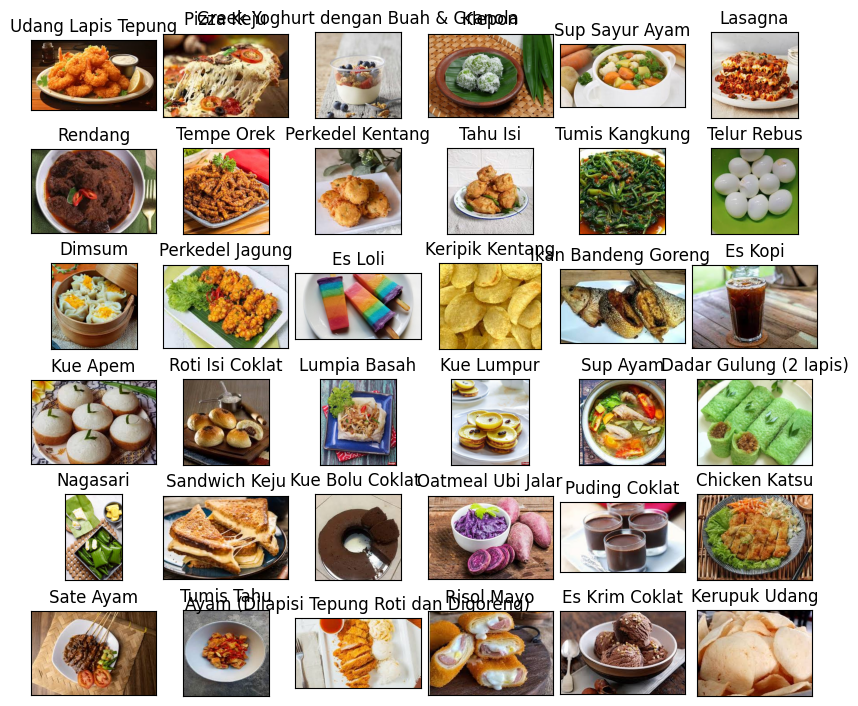

In [10]:
# Create a DataFrame with one Label of each category
df_unique = train_df.copy().drop_duplicates(subset=["Label"]).reset_index()

# Display some pictures of the dataset
fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(8, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df_unique.Filepath[i]))
    ax.set_title(df_unique.Label[i], fontsize = 12)
plt.tight_layout(pad=0.5)
plt.show()

In [11]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

In [12]:
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

Found 514 validated image filenames belonging to 64 classes.


In [13]:
val_images = train_generator.flow_from_dataframe(
    dataframe=val_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

Found 64 validated image filenames belonging to 64 classes.


In [14]:
test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 64 validated image filenames belonging to 64 classes.


In [15]:
pretrained_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)
pretrained_model.trainable = False

In [17]:
inputs = pretrained_model.input

x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)

outputs = tf.keras.layers.Dense(64, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_images,
    validation_data=val_images,
    batch_size = 32,
    epochs=5,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=2,
            restore_best_weights=True
        )
    ]
)

Epoch 1/5


/home/dafahan/code/py/foodrecognition/.venv/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2024-05-11 19:46:17.742954: W tensorflow/core/framework/op_kernel.cc:1827] UNKNOWN: UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x74b5645705e0>
Traceback (most recent call last):

  File "/home/dafahan/code/py/foodrecognition/.venv/lib/python3.11/site-packages/tensorflow/python/ops/script_ops.py", line 270, in __call__
    ret = func(*args)
          ^^^^^^^^^^^

  File "/home/dafahan/code/py/foodrecognition/.venv/lib/python3.11/site-packages/tensorflow/python/autograph/impl/api.py", line 643, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^

UnknownError: Graph execution error:

Detected at node PyFunc defined at (most recent call last):
<stack traces unavailable>
UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x74b5645705e0>
Traceback (most recent call last):

  File "/home/dafahan/code/py/foodrecognition/.venv/lib/python3.11/site-packages/tensorflow/python/ops/script_ops.py", line 270, in __call__
    ret = func(*args)
          ^^^^^^^^^^^

  File "/home/dafahan/code/py/foodrecognition/.venv/lib/python3.11/site-packages/tensorflow/python/autograph/impl/api.py", line 643, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^

  File "/home/dafahan/code/py/foodrecognition/.venv/lib/python3.11/site-packages/tensorflow/python/data/ops/from_generator_op.py", line 198, in generator_py_func
    values = next(generator_state.get_iterator(iterator_id))
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

  File "/home/dafahan/code/py/foodrecognition/.venv/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py", line 260, in _get_iterator
    for i, batch in enumerate(gen_fn()):

  File "/home/dafahan/code/py/foodrecognition/.venv/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py", line 253, in generator_fn
    yield self.py_dataset[i]
          ~~~~~~~~~~~~~~~^^^

  File "/home/dafahan/code/py/foodrecognition/.venv/lib/python3.11/site-packages/keras/src/legacy/preprocessing/image.py", line 68, in __getitem__
    return self._get_batches_of_transformed_samples(index_array)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

  File "/home/dafahan/code/py/foodrecognition/.venv/lib/python3.11/site-packages/keras/src/legacy/preprocessing/image.py", line 313, in _get_batches_of_transformed_samples
    img = image_utils.load_img(
          ^^^^^^^^^^^^^^^^^^^^^

  File "/home/dafahan/code/py/foodrecognition/.venv/lib/python3.11/site-packages/keras/src/utils/image_utils.py", line 236, in load_img
    img = pil_image.open(io.BytesIO(f.read()))
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

  File "/home/dafahan/code/py/foodrecognition/.venv/lib/python3.11/site-packages/PIL/Image.py", line 3339, in open
    raise UnidentifiedImageError(msg)

PIL.UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x74b5645705e0>


	 [[{{node PyFunc}}]]
	 [[IteratorGetNext]] [Op:__inference_one_step_on_iterator_9899]